In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Wrapper class for scalar values

That will allow us build mathematical expresions using basic operations with information about what values created them with what operation. It will allow us to build a graph of operations and then calculate gradients using backpropagation.

In [21]:
class Value:
    def __init__(self, data, children=(), operation='', label=''):
        self.data = data
        self.gradient = 0.0
        self.children = set(children)
        self.operation = operation
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data}, children={self.children}, op='{self.operation}')"
    
    def __add__(self, other):
            return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
            return Value(self.data * other.data, (self, other), '*')
    

In [22]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
d = Value(-2.0, label = 'd')
ab = a*b; ab.label = 'ab'
abc = ab+c; abc.label = 'abc'
L = abc*d; L.label = 'L' # L = (a*b+c)*d

### Manual backpropagation
Caluclation of derivatives for L in respect to a, b, c, d using chain rule

In [23]:
# dL/dL
L.gradient = 1.0
# dL/dabc
abc.gradient = d.data
# dL/dd
d.gradient = abc.data
# dL/ab = dL/dabc * dabc/dab
ab.gradient = abc.gradient * 1
# dL/dc = dL/dabc * dabc/dc
c.gradient = abc.gradient * 1
# dL/da = dL/dab * dab/da
a.gradient = ab.gradient * b.data
# dL/db = dL/dab * dab/db
b.gradient = ab.gradient * a.data

### Visualization of simple forward pass

Forward pass refers to the process of propagating input data through the network's layers to produce an output prediction

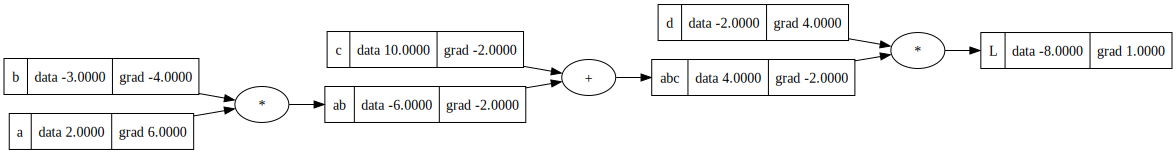

In [24]:
from ipynb.fs.full.draw import draw_dot

draw_dot(L)